# Scenario with parked vehicles

In [1]:
import sys  
sys.path.insert(0, 'src/')

from commonroad.common.file_reader import CommonRoadFileReader
from simulate_trajectory import step_simulation
from visualizer import Visualizer
import yaml
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

### Plot function used for the visualizations

In [2]:
def plot(time_step, ego_vehicle, scenarios, sensor_views):
    plt.cla()
    Visualizer().plot(scenario=scenarios[time_step],
                  sensor_view=sensor_views[time_step],
                  ego_vehicle=scenarios[time_step].obstacle_by_id(ego_vehicle.obstacle_id),
                  time_begin=time_step)
    plt.axis('scaled')
    plt.xlim(-60,60)
    plt.ylim(-50,10)

### Import the scenario

In [3]:
with open("my_scenario/config_MyScenario.yaml") as file:
    config = yaml.load(file, Loader=yaml.FullLoader)
    
scenario1, _ = CommonRoadFileReader("my_scenario/ZAM_MyIntersection-1_1_T-1.xml").open()
scenario2, _ = CommonRoadFileReader("my_scenario/ZAM_MyIntersection-1_1_T-1.xml").open()

/home/christiaan/.virtualenvs/thesis/lib/python3.8/site-packages/commonroad/scenario/lanelet.py:1263: ShapelyDeprecationWarning: STRtree will be changed in 2.0.0 and will not be compatible with versions < 2.
  self._strtee = STRtree(list(self._buffered_polygons.values()))


### Simulations (It will take some time)

In [4]:
track_vehicle, tracked_scenarios, tracked_views = step_simulation(scenario1, config)
config['tracking_enabled'] = False
no_track_vehicle, not_tracked_scenarios, not_tracked_views = step_simulation(scenario2, config)

Initialization took: 0.013422727584838867 s
No. of vehicles: 1
Step 0: took 0.17121005058288574 s
No. of vehicles: 1
Step 1: took 0.14404869079589844 s
No. of vehicles: 1
Step 2: took 0.1328592300415039 s
No. of vehicles: 1
Step 3: took 0.1489276885986328 s
No. of vehicles: 1
Step 4: took 0.15294480323791504 s
No. of vehicles: 1
Step 5: took 0.14297151565551758 s
No. of vehicles: 1
Step 6: took 0.14386534690856934 s
No. of vehicles: 1
Step 7: took 0.1554253101348877 s
No. of vehicles: 1
Step 8: took 0.16101789474487305 s
No. of vehicles: 1
Step 9: took 0.1665494441986084 s
No. of vehicles: 1
Step 10: took 0.16060304641723633 s
No. of vehicles: 1
Step 11: took 0.20727157592773438 s
No. of vehicles: 1
Step 12: took 0.16678357124328613 s
No. of vehicles: 1
Step 13: took 0.20195889472961426 s
No. of vehicles: 1
Step 14: took 0.2000596523284912 s
No. of vehicles: 1
Step 15: took 0.18357038497924805 s
No. of vehicles: 1
Step 16: took 0.16002202033996582 s
No. of vehicles: 1
Step 17: took 0.1

### Plots (Same as Figure 12 in the paper)

In [5]:
# import matplotlib.pyplot as plt

# for time_step, scenario in enumerate(tracked_scenarios):
#     # ids = [obs.obstacle_id for obs in scenario.dynamic_obstacles]
#     # print(ids)
#     car = scenario.obstacle_by_id(36)
#     if car is not None:
#         occupancy = car.occupancy_at_time(time_step)
#         plt.plot(*occupancy.shape.vertices.T)
#         plt.gca().set_aspect('equal')
#         plt.xlim(-60,60)
#         plt.ylim(-50,10)

"""
    Dynamic obstacle is only visualized/considered when observable. This behaviour is implemented by the sensor class.
"""

'\n    Dynamic obstacle is only visualized/considered when observable. This behaviour is implemented by the sensor class.\n'

33


Is dynamic obstacle drawn?: (<class 'commonroad.scenario.obstacle.DynamicObstacle'>, 33)
Is dynamic obstacle drawn?: (<class 'commonroad.scenario.obstacle.DynamicObstacle'>, 37)
Is dynamic obstacle drawn?: (<class 'commonroad.scenario.obstacle.DynamicObstacle'>, 38)
Is dynamic obstacle drawn?: (<class 'commonroad.scenario.obstacle.DynamicObstacle'>, 39)
Is dynamic obstacle drawn?: (<class 'commonroad.scenario.obstacle.DynamicObstacle'>, 40)
Is dynamic obstacle drawn?: (<class 'commonroad.scenario.obstacle.DynamicObstacle'>, 41)
Is dynamic obstacle drawn?: (<class 'commonroad.scenario.obstacle.DynamicObstacle'>, 33)
Is dynamic obstacle drawn?: (<class 'commonroad.scenario.obstacle.DynamicObstacle'>, 37)
Is dynamic obstacle drawn?: (<class 'commonroad.scenario.obstacle.DynamicObstacle'>, 38)
Is dynamic obstacle drawn?: (<class 'commonroad.scenario.obstacle.DynamicObstacle'>, 39)
Is dynamic obstacle drawn?: (<class 'commonroad.scenario.obstacle.DynamicObstacle'>, 36)
Is dynamic obstacle d

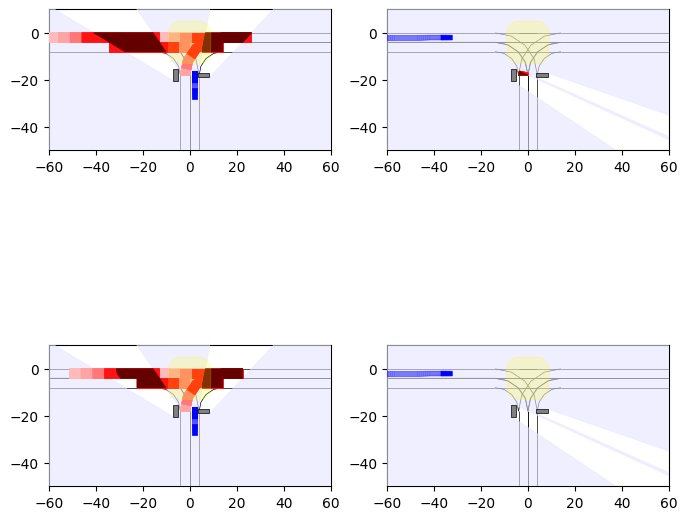

In [6]:
# t1 = 0
# t2 = 2
print(no_track_vehicle.obstacle_id)
t1 = 5
t2 = len(tracked_scenarios) - 1
fig, ax = plt.subplots(2, 2, figsize=(20,13))
plt.sca(ax[0][0])
plot(t1, no_track_vehicle, not_tracked_scenarios, not_tracked_views)
plt.sca(ax[0][1])
plot(t2, no_track_vehicle, not_tracked_scenarios, not_tracked_views)
plt.sca(ax[1][0])
plot(t1, track_vehicle, tracked_scenarios, tracked_views)
plt.sca(ax[1][1])
plot(t2, track_vehicle, tracked_scenarios, tracked_views)

### Animation of the baseline method

Is dynamic obstacle drawn?: (<class 'commonroad.scenario.obstacle.DynamicObstacle'>, 33)
Is dynamic obstacle drawn?: (<class 'commonroad.scenario.obstacle.DynamicObstacle'>, 37)
Is dynamic obstacle drawn?: (<class 'commonroad.scenario.obstacle.DynamicObstacle'>, 38)
Is dynamic obstacle drawn?: (<class 'commonroad.scenario.obstacle.DynamicObstacle'>, 39)
Is dynamic obstacle drawn?: (<class 'commonroad.scenario.obstacle.DynamicObstacle'>, 40)
Is dynamic obstacle drawn?: (<class 'commonroad.scenario.obstacle.DynamicObstacle'>, 41)
Is dynamic obstacle drawn?: (<class 'commonroad.scenario.obstacle.DynamicObstacle'>, 36)
Is dynamic obstacle drawn?: (<class 'commonroad.scenario.obstacle.DynamicObstacle'>, 33)
Is dynamic obstacle drawn?: (<class 'commonroad.scenario.obstacle.DynamicObstacle'>, 37)
Is dynamic obstacle drawn?: (<class 'commonroad.scenario.obstacle.DynamicObstacle'>, 38)
Is dynamic obstacle drawn?: (<class 'commonroad.scenario.obstacle.DynamicObstacle'>, 39)
Is dynamic obstacle d

Is dynamic obstacle drawn?: (<class 'commonroad.scenario.obstacle.DynamicObstacle'>, 33)
Is dynamic obstacle drawn?: (<class 'commonroad.scenario.obstacle.DynamicObstacle'>, 37)
Is dynamic obstacle drawn?: (<class 'commonroad.scenario.obstacle.DynamicObstacle'>, 38)
Is dynamic obstacle drawn?: (<class 'commonroad.scenario.obstacle.DynamicObstacle'>, 39)
Is dynamic obstacle drawn?: (<class 'commonroad.scenario.obstacle.DynamicObstacle'>, 40)
Is dynamic obstacle drawn?: (<class 'commonroad.scenario.obstacle.DynamicObstacle'>, 41)
Is dynamic obstacle drawn?: (<class 'commonroad.scenario.obstacle.DynamicObstacle'>, 36)


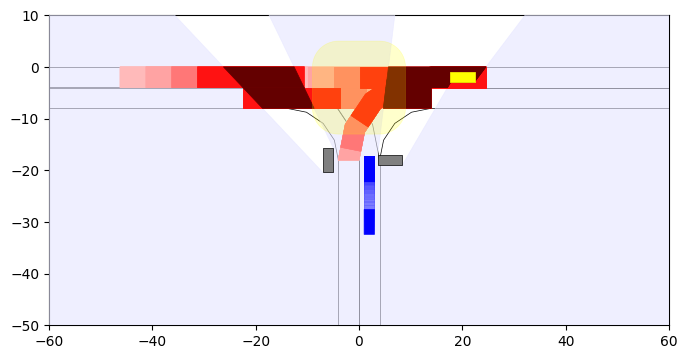

In [7]:
fig = plt.figure(figsize=(10, 10))
anim = animation.FuncAnimation(fig, plot, fargs=[no_track_vehicle, not_tracked_scenarios, not_tracked_views], frames=len(tracked_scenarios), interval=100, blit=False)
HTML(anim.to_html5_video())

### Animation of the proposed method

Is dynamic obstacle drawn?: (<class 'commonroad.scenario.obstacle.DynamicObstacle'>, 33)
Is dynamic obstacle drawn?: (<class 'commonroad.scenario.obstacle.DynamicObstacle'>, 37)
Is dynamic obstacle drawn?: (<class 'commonroad.scenario.obstacle.DynamicObstacle'>, 38)
Is dynamic obstacle drawn?: (<class 'commonroad.scenario.obstacle.DynamicObstacle'>, 39)
Is dynamic obstacle drawn?: (<class 'commonroad.scenario.obstacle.DynamicObstacle'>, 40)
Is dynamic obstacle drawn?: (<class 'commonroad.scenario.obstacle.DynamicObstacle'>, 41)
Is dynamic obstacle drawn?: (<class 'commonroad.scenario.obstacle.DynamicObstacle'>, 36)
Is dynamic obstacle drawn?: (<class 'commonroad.scenario.obstacle.DynamicObstacle'>, 33)
Is dynamic obstacle drawn?: (<class 'commonroad.scenario.obstacle.DynamicObstacle'>, 37)
Is dynamic obstacle drawn?: (<class 'commonroad.scenario.obstacle.DynamicObstacle'>, 38)
Is dynamic obstacle drawn?: (<class 'commonroad.scenario.obstacle.DynamicObstacle'>, 39)
Is dynamic obstacle d

Is dynamic obstacle drawn?: (<class 'commonroad.scenario.obstacle.DynamicObstacle'>, 33)
Is dynamic obstacle drawn?: (<class 'commonroad.scenario.obstacle.DynamicObstacle'>, 37)
Is dynamic obstacle drawn?: (<class 'commonroad.scenario.obstacle.DynamicObstacle'>, 38)
Is dynamic obstacle drawn?: (<class 'commonroad.scenario.obstacle.DynamicObstacle'>, 39)
Is dynamic obstacle drawn?: (<class 'commonroad.scenario.obstacle.DynamicObstacle'>, 40)
Is dynamic obstacle drawn?: (<class 'commonroad.scenario.obstacle.DynamicObstacle'>, 41)
Is dynamic obstacle drawn?: (<class 'commonroad.scenario.obstacle.DynamicObstacle'>, 36)


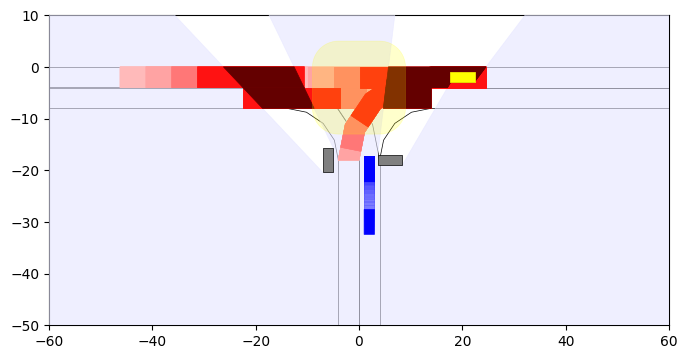

In [8]:
fig = plt.figure(figsize=(10, 10))
anim = animation.FuncAnimation(fig, plot, fargs=[track_vehicle, tracked_scenarios, tracked_views], frames=len(tracked_scenarios), interval=100, blit=False)
HTML(anim.to_html5_video())

### Velocity comparison (Same as Figure 13)

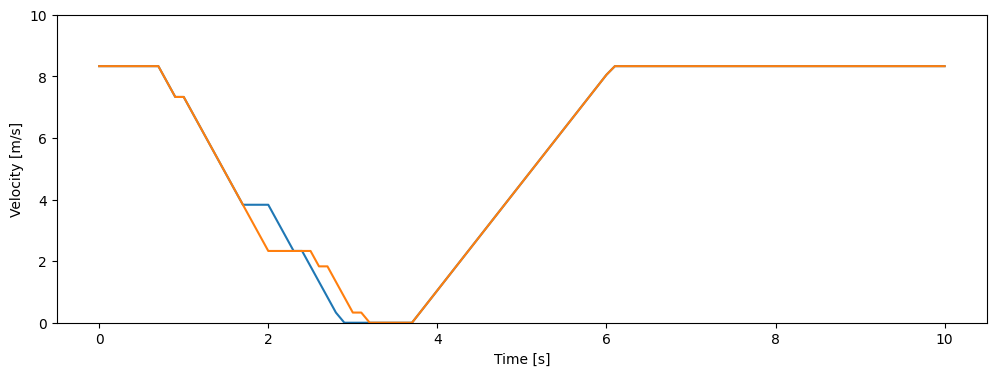

In [9]:
plt.figure(figsize=(12, 4))
labels = ['Proposed method','Baseline method']
for idx, vehicle in enumerate([track_vehicle, no_track_vehicle]):
    velocities = [round(vehicle.initial_state.velocity, 2)]
    time = [round(vehicle.initial_state.time_step/10, 2)]
    for state in vehicle.prediction.trajectory.state_list:
        velocities.append(round(state.velocity, 2))
        time.append(round(state.time_step/10, 2))
    plt.plot(time, velocities, label=labels[idx])
plt.xlabel('Time [s]')
plt.ylabel('Velocity [m/s]')
plt.ylim(0, 10);